In [8]:
## Part 1 


import os
import pandas as pd

# Define directory and country codes
data_dir = '/Users/Shreya1/Documents/GitHub/07-visualization-ShreyaSreeram/ddf--datapoints--population--by--country--age--gender--year'
country_codes = ['afg', 'ben', 'rus', 'tha', 'usa']

# Create a list to store DataFrames for all countries
countries = []

# Load all files in directory that match country code to a DataFrame
for code in country_codes:
   
    all_files = [f for f in os.listdir(data_dir) if f"country-{code}" in f]
    for file_name in all_files:
        file_path = os.path.join(data_dir, file_name)
        try:
            # Load the file into a DataFrame
            df = pd.read_csv(file_path)
            df['country_code'] = code  # Add a column for country code
            countries.append(df)  #Append the df to the list
            print(f"Loaded data for country code: {code} from {file_name}")
        except FileNotFoundError:
            print(f"File not found: {file_path}")

# Combine all DataFrames into a single Df
if countries:
    combined_data = pd.concat(countries, ignore_index=True)
    print("All country data combined into a single DataFrame.")
    print(combined_data.head()) 
else:
    print("No data found for the specified countries.")

Loaded data for country code: afg from ddf--datapoints--population--by--country-afg--age--gender--year.csv
Loaded data for country code: ben from ddf--datapoints--population--by--country-ben--age--gender--year.csv
Loaded data for country code: rus from ddf--datapoints--population--by--country-rus--age--gender--year.csv
Loaded data for country code: tha from ddf--datapoints--population--by--country-tha--age--gender--year.csv
Loaded data for country code: usa from ddf--datapoints--population--by--country-usa--age--gender--year.csv
All country data combined into a single DataFrame.
  country  age  gender  year  population country_code
0     afg    0       1  1950      157787          afg
1     afg    0       1  1951      159263          afg
2     afg    0       1  1952      162643          afg
3     afg    0       1  1953      165963          afg
4     afg    0       1  1954      169174          afg


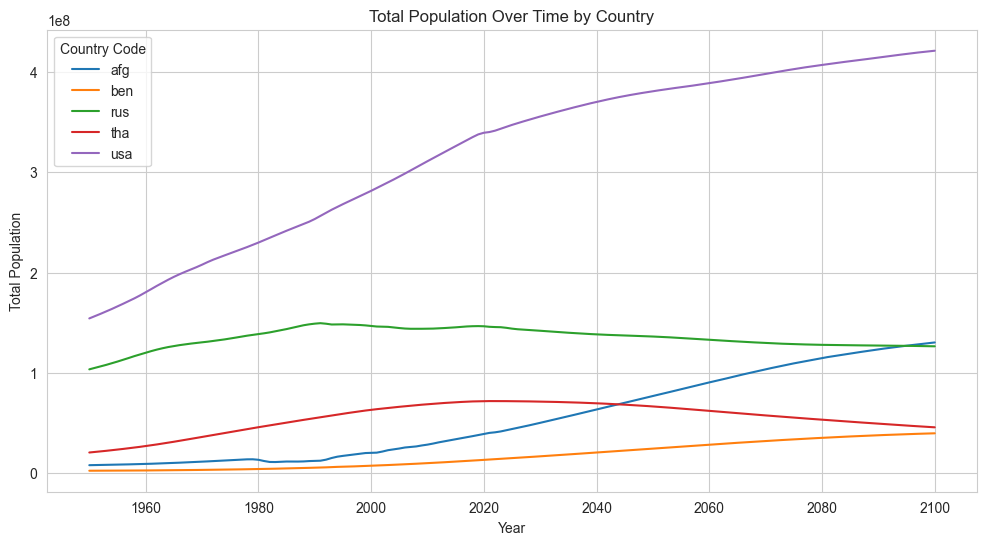

In [16]:
import matplotlib.pyplot as plt

# Calculate total population by year for each country
# Grouping by 'year' and 'country_code', then sum the population
total_population = combined_data.groupby(['year', 'country_code'])['population'].sum().unstack()

# Plotting
plt.figure(figsize=(12, 6))

#Iterate over each country to plot their population trend
for country in country_codes:
    plt.plot(total_population.index, total_population[country], label=country)

#labels, title, legend, and grid
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.title('Total Population Over Time by Country')
plt.legend(title="Country Code")
plt.grid(True)

plt.show()

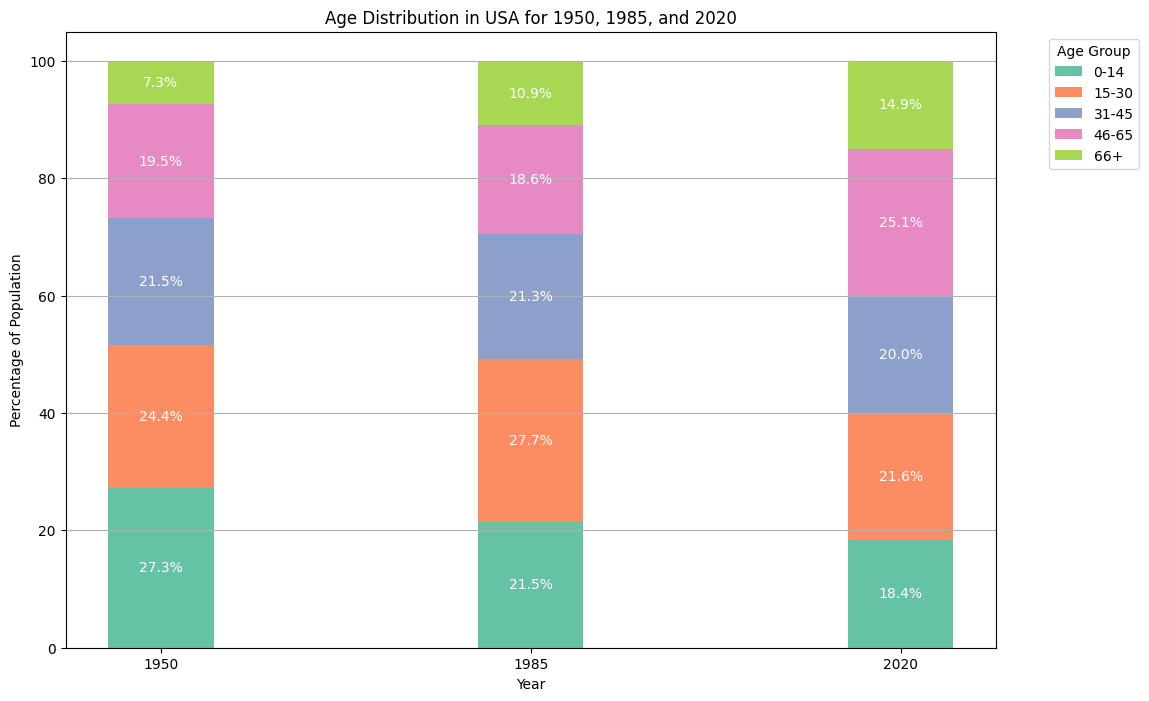

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import os

#Define age groups as ranges
age_groups = {
    '0-14': list(range(0, 15)),
    '15-30': list(range(15, 31)),
    '31-45': list(range(31, 46)),
    '46-65': list(range(46, 66)),
    '66+': list(range(66, 101)) 
}

#Function to group by 'year' and 'age_group' and sum the population for each group
def aggregate_age_groups(df, age_groups):
    def map_age_to_group(age):
        for group, ages in age_groups.items():
            if age in ages:
                return group
        return None
    
    # Map each age to an age group and calculate population by age group for each year
    df['age_group'] = df['age'].apply(map_age_to_group)
    return df.groupby(['year', 'age_group'])['population'].sum().unstack('age_group')

# Load data for the specific country (USA)
df = pd.read_csv(f'{data_dir}/ddf--datapoints--population--by--country-usa--age--gender--year.csv')

#Aggregate data by age group
age_distribution = aggregate_age_groups(df, age_groups)

#Selecting the years to compare
selected_years = [1950, 1985, 2020]

# Define custom colors for each age group
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854']  

#Increase bar width and adjust the figure size
bar_width = 10  
plt.figure(figsize=(12, 8))  
bottoms = [0] * len(selected_years)

# Store bar handles for the legend and iterate over age groups to aggregate proportions
bars = [] 
for idx, age_group in enumerate(age_groups.keys()):
    year_percentages = []
    for year in selected_years:
        if year in age_distribution.index:
            df_year = age_distribution.loc[year]
            percentages = df_year.div(df_year.sum()) * 100  
            year_percentages.append(percentages.get(age_group, 0))  #Get percentage or 0 if missing
        else:
            print(f"Year {year} not found in the dataset")
            year_percentages.append(0)

    # Plotting 
    bar = plt.bar(selected_years, year_percentages, bar_width, bottom=bottoms, label=age_group, color=colors[idx])
    bottoms = [b + p for b, p in zip(bottoms, year_percentages)] 
    bars.append(bar[0])

    #annotations for each segment
    for i in range(len(selected_years)):
        if year_percentages[i] > 0:  
            plt.text(selected_years[i], bottoms[i] - year_percentages[i] / 2, f'{year_percentages[i]:.1f}%', 
                     ha='center', va='center', color='white', fontsize=10)


plt.xticks(selected_years, [str(year) for year in selected_years])
plt.xlabel('Year')
plt.ylabel('Percentage of Population')
plt.title('Age Distribution in USA for 1950, 1985, and 2020')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.show()

In [15]:
#Part 2: 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

#Set Seaborn style
sns.set_style("whitegrid")

data_dir = '/Users/Shreya1/Documents/GitHub/07-visualization-ShreyaSreeram/ddf--datapoints--population--by--country--age--gender--year'

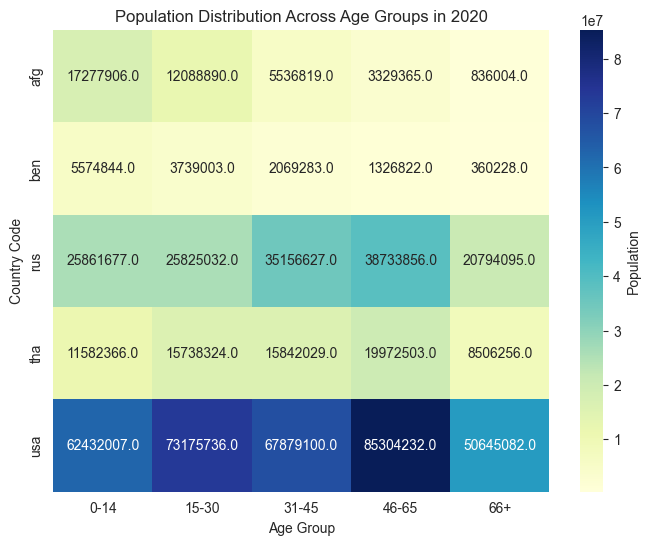

In [18]:
#Heatmap: 

#Define age groups and the chosen year
age_groups = {
    '0-14': list(range(0, 15)),
    '15-30': list(range(15, 31)),
    '31-45': list(range(31, 46)),
    '46-65': list(range(46, 66)),
    '66+': list(range(66, 101))
}
chosen_year = 2020
country_codes = ['afg', 'ben', 'rus', 'tha', 'usa']

#Aggregate population by age group for each country
def get_age_group_population(df, age_groups, year):
    df = df[df['year'] == year]
    age_group_pop = {}
    for group, ages in age_groups.items():
        age_group_pop[group] = df[df['age'].isin(ages)]['population'].sum()
    return age_group_pop


heatmap_data = {}
for code in country_codes:
    file_path = os.path.join(data_dir, f'ddf--datapoints--population--by--country-{code}--age--gender--year.csv')
    df = pd.read_csv(file_path)
    heatmap_data[code] = get_age_group_population(df, age_groups, chosen_year)

#Convert data to a df for heatmap
heatmap_df = pd.DataFrame(heatmap_data).T  

#Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_df, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Population'})
plt.xlabel("Age Group")
plt.ylabel("Country Code")
plt.title(f"Population Distribution Across Age Groups in {chosen_year}")
plt.show()

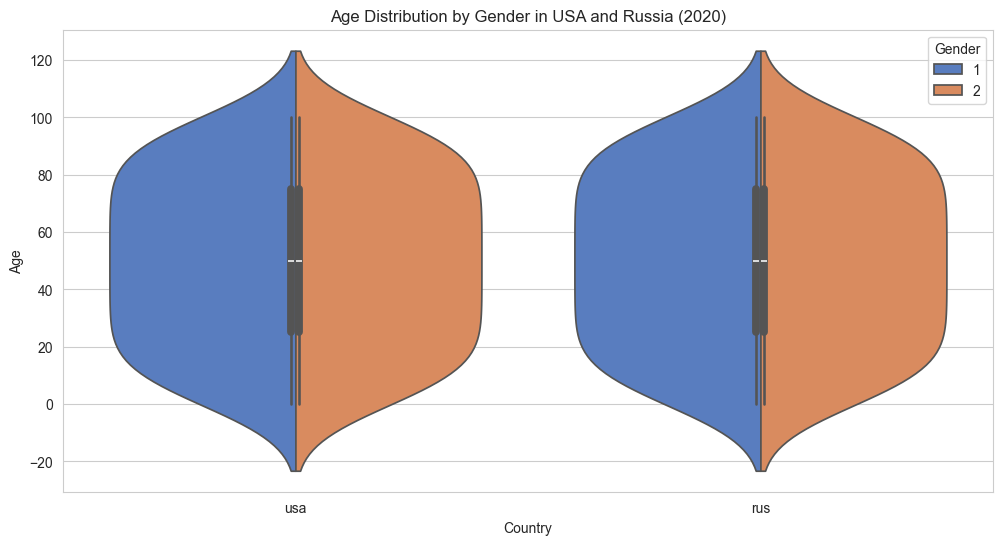

In [19]:
#usa & rus selected and filtering data for 2020
country1, country2 = 'usa', 'rus'
file1 = os.path.join(data_dir, f'ddf--datapoints--population--by--country-{country1}--age--gender--year.csv')
file2 = os.path.join(data_dir, f'ddf--datapoints--population--by--country-{country2}--age--gender--year.csv')

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

df1 = df1[(df1['year'] == 2020)].copy()
df2 = df2[(df2['year'] == 2020)].copy()
df1['country'] = country1
df2['country'] = country2

#Combine the data
combined_df = pd.concat([df1, df2])

#Plot violin plots
plt.figure(figsize=(12, 6))
sns.violinplot(data=combined_df, x='country', y='age', hue='gender', split=True, palette="muted")
plt.xlabel("Country")
plt.ylabel("Age")
plt.title("Age Distribution by Gender in USA and Russia (2020)")
plt.legend(title="Gender")
plt.show()

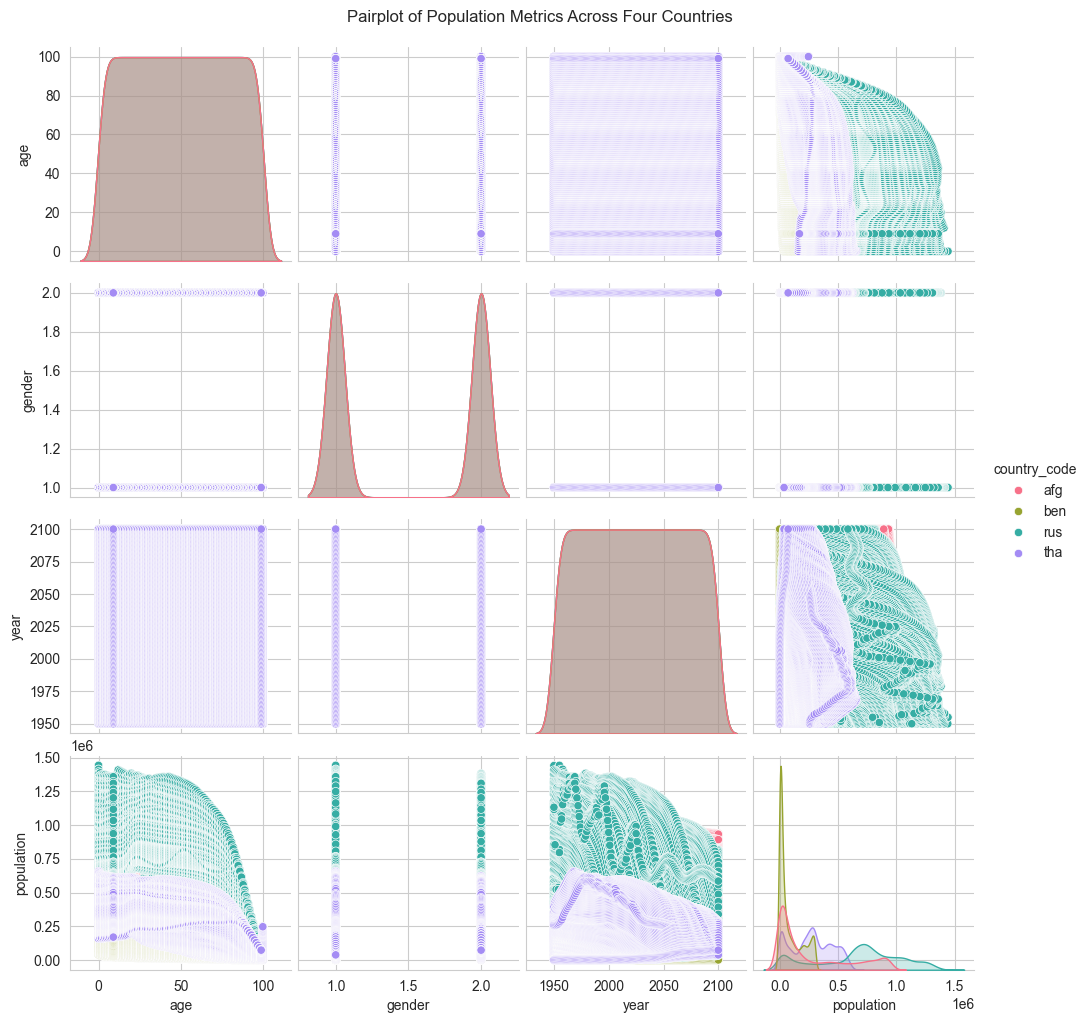

In [20]:
#Pairplots: 

#Selected four countries
selected_countries = ['afg', 'ben', 'rus', 'tha']
dfs = []

for code in selected_countries:
    file_path = os.path.join(data_dir, f'ddf--datapoints--population--by--country-{code}--age--gender--year.csv')
    df = pd.read_csv(file_path)
    df['country_code'] = code
    dfs.append(df)

# Combine data into one df
combined_data = pd.concat(dfs)


sns.pairplot(combined_data, hue='country_code', palette='husl', height=2.5)
plt.suptitle("Pairplot of Population Metrics Across Four Countries", y=1.02)
plt.show()